In [1]:

import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 1: Collect YAML paths
base_path = "CIFAR10_dirichlet0.05_12"
yaml_paths = []


In [3]:
for i in range(12):
    path = os.path.join(base_path, f"part_{i}", "CIFAR10_dirichlet0.05_12", "train_dataset_config.yaml")
    if os.path.exists(path):
        yaml_paths.append(path)

print(f"Found {len(yaml_paths)} YAML files.")


Found 12 YAML files.


In [4]:
# Step 2: Parse YAMLs
all_data = []

for path in yaml_paths:
    with open(path, 'r') as f:
        content = yaml.safe_load(f)

    client_id ="Client_" + os.path.basename(os.path.dirname(os.path.dirname(path))).split("_")[-1]# e.g., part_0
    num_items = content["metadata"]["num_items"]
    label_distribution = content["metadata"]["label_distribution"]

    for class_label, proportion in label_distribution.items():
        count = int(proportion * num_items)
        all_data.append({
            "client": client_id,
            "label": int(class_label),
            "count": count
        })


In [5]:

# Step 3: Create DataFrame
df = pd.DataFrame(all_data)


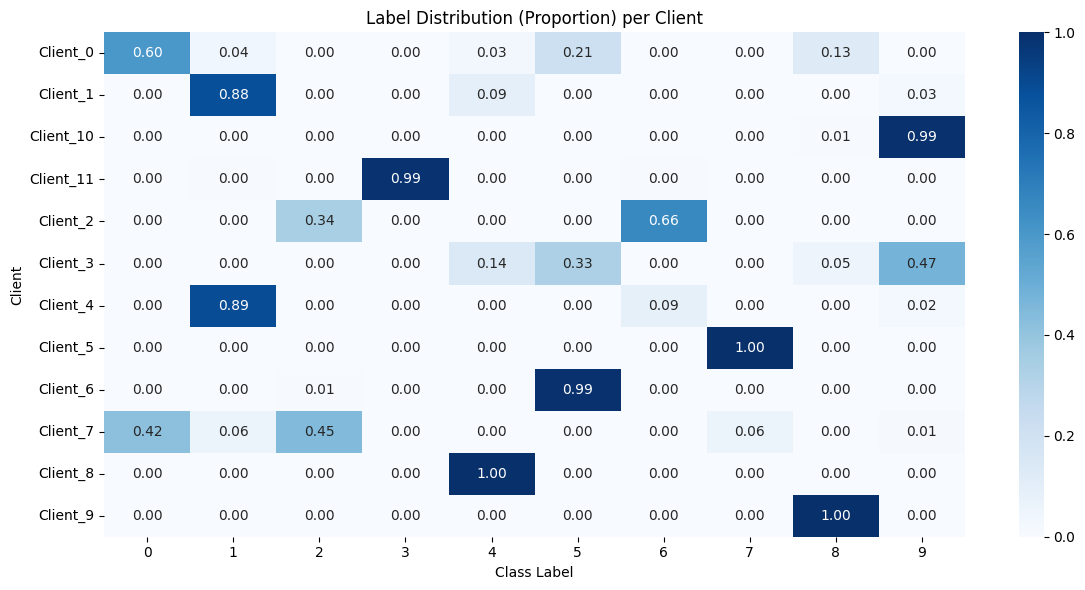

In [6]:

# --------------------------------------
# Plot 1: Label distribution per client (normalized heatmap)
pivot = df.pivot(index="client", columns="label", values="count").fillna(0)
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_norm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Label Distribution (Proportion) per Client")
plt.xlabel("Class Label")
plt.ylabel("Client")
plt.tight_layout()
plt.show()

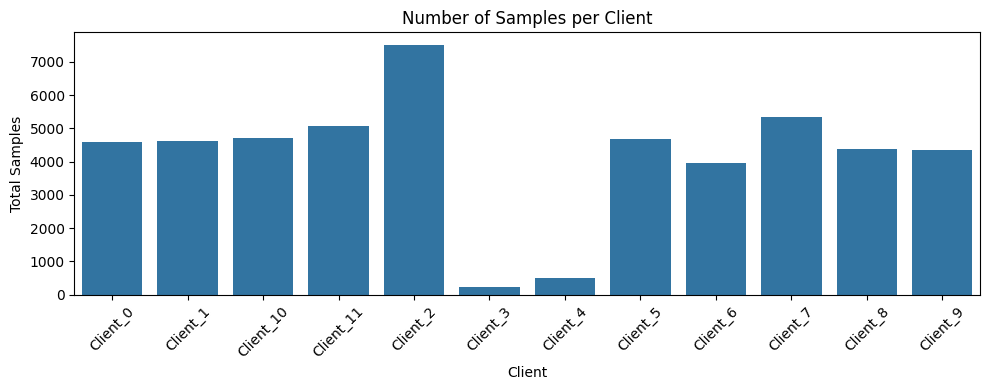

In [7]:
# --------------------------------------
# Plot 2: Number of samples per client
client_sizes = df.groupby("client")["count"].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x="client", y="count", data=client_sizes.sort_values("client"))
plt.title("Number of Samples per Client")
plt.ylabel("Total Samples")
plt.xlabel("Client")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


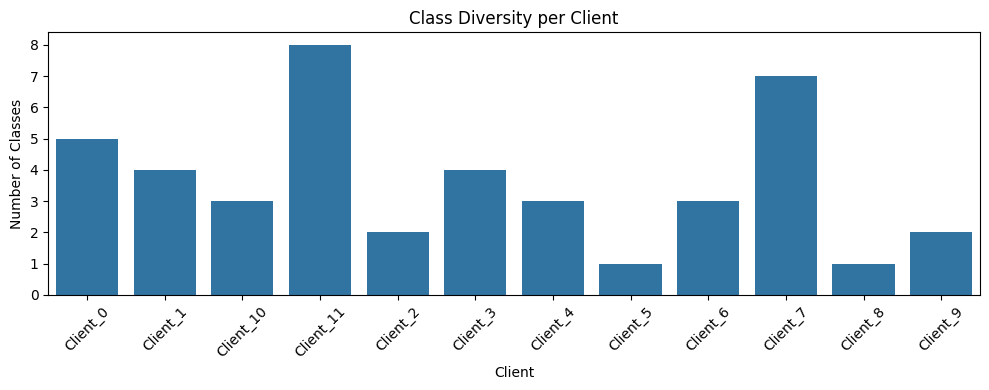

In [8]:
# --------------------------------------
# Plot 3: Class diversity (number of unique labels per client)
class_diversity = df.groupby("client")["label"].nunique().reset_index(name="num_classes")

plt.figure(figsize=(10, 4))
sns.barplot(x="client", y="num_classes", data=class_diversity.sort_values("client"))
plt.title("Class Diversity per Client")
plt.ylabel("Number of Classes")
plt.xlabel("Client")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:

# --------------------------------------
# Optional: Combined Summary Table
summary_df = client_sizes.merge(class_diversity, on="client")
print("\nSummary Table:")
print(summary_df.sort_values("num_classes", ascending=False))


Summary Table:
       client  count  num_classes
3   Client_11   5062            8
9    Client_7   5330            7
0    Client_0   4607            5
1    Client_1   4632            4
5    Client_3    240            4
2   Client_10   4717            3
8    Client_6   3972            3
6    Client_4    495            3
11   Client_9   4366            2
4    Client_2   7513            2
7    Client_5   4668            1
10   Client_8   4395            1
